# COMPARING CLASSIFICATION ALGORITHMS FOR CROP RECOMMENDATION IN PRECISION AGRICULTURE USING MACHINE LEARNING

## Introduction

The code below analyzes the "Crop_recommendation.csv" dataset, which was obtained from Kaggle. The dataset contains 2200 rows and 8 columns of information on various crops, their nutrients, soil type, and growth time.

## 1. Importing Necessary Libraries 

In [1]:
#Importing the necessary libraries such as numpy, pandas, matplotlib, seaborn, scikit-learn, and scipy.
import numpy as np   # linear algebra
import pandas as pd  # data processing

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# training and testing data
from sklearn.model_selection import train_test_split

from scipy import stats

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve,  precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn import tree

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, label_binarize, LabelEncoder

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline

# Multiclass
from sklearn.multiclass import OneVsRestClassifier

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)


## 2. Loading and Exploring the Crop Recommendation Dataset

In [2]:
# Load the dataset into a dataframe and display its first five rows to understand the structure of the dataset.
crops = pd.read_csv("Crop_recommendation.csv")
crops.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Determine the dimensions of the dataset
crops.shape

(2200, 8)

The dataset has 2200 entries and 8 columns

In [4]:
# Determine the columns present in the dataset.
crops.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
# Provide an overview of the dataset, including the number of non-null values and data types.
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Findings: We can see that the dataset contains 7 numerical variables and 1 character variable.

Label is the target variable.

In [6]:
# Check the data types of the variables in the dataset.
crops.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
# Provide statistics of the numerical features in the data.
crops.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# Check for missing values in the dataset.
crops.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# Check for duplicate values in the dataset.
crops.duplicated().sum()

0

In [10]:
#checking for unique crop names in the 'label' column
crops.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
#checking for the number of unique crop names in the 'label' column
crops.label.nunique()

22

In [12]:
#checking for count of each crop present in the dataset
crops.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## 3. Exploratory Data Analysis

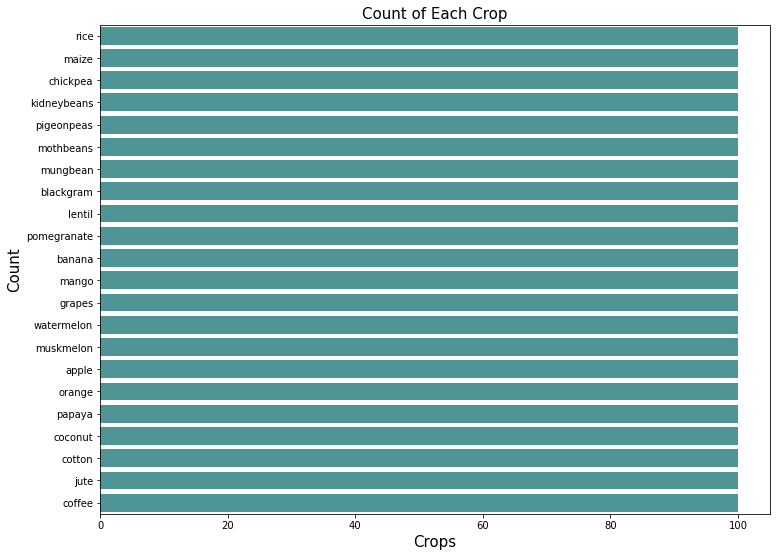

In [13]:
# Countplot of the label distribution
plt.figure(figsize=(12,9))
sns.countplot(y = crops["label"], palette=["#44A1A0"])
plt.title("Count of Each Crop",fontsize=15)
plt.xlabel("Crops",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

__Observation:__ 
There are 22 classes and each class has 100 entries, which means that it is a perfectly balanced dataset. Having a balanced dataset is beneficial because it ensures that each class is equally represented in the training set, which can prevent the model from becoming biased towards one particular class. 

## Univariate Analysis

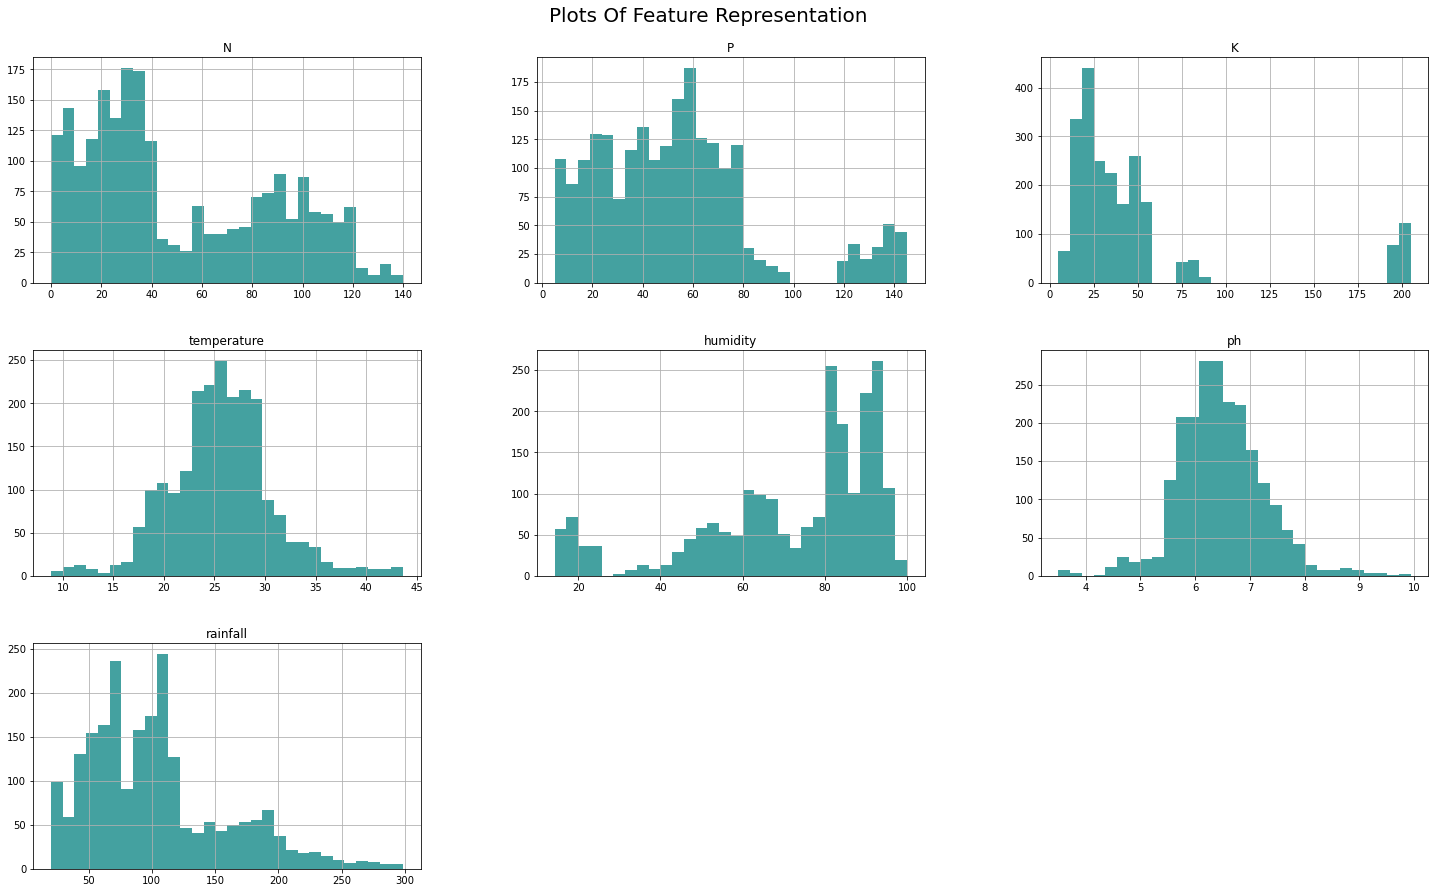

In [14]:
# Plotting the histograms of data
fig, ax = plt.subplots(figsize = (25,14))
crops.hist(bins = 30, color=["#44A1A0"], ax=ax)
plt.ylabel("Frequency")
ax.set(title="Plots Of Feature Representation")
fig.suptitle("Plots Of Feature Representation", fontsize = 20)
fig.subplots_adjust(top=0.93)
plt.show()

__Observations:__ 
* Temperature and pH have a normal distribution.
* Humidity is left skewed
* Rainfall is right skewed

In [15]:
num_crops = crops[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
num_crops

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


Text(0.5, 0.98, 'Visualizing the numeric columns')

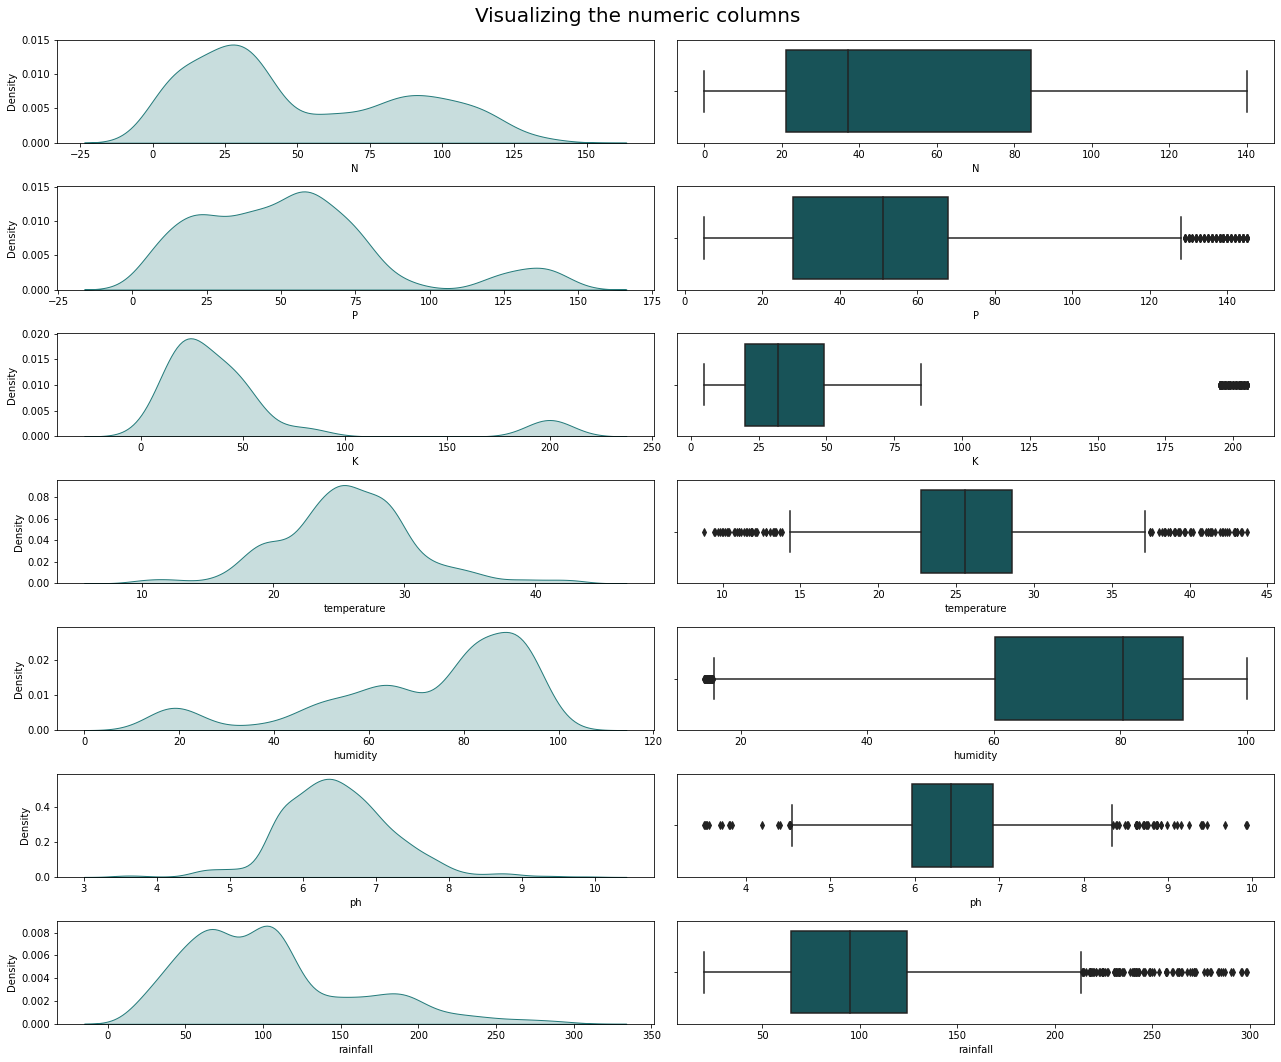

In [16]:
fig,ax = plt.subplots(7,2,figsize=(18,15))
for index,i in enumerate(num_crops.columns):
    sns.kdeplot(num_crops[i],ax=ax[index,0],color="#247B7B", fill = True)
    sns.boxplot(num_crops[i],ax=ax[index,1],color="#0D5C63")
        
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing the numeric columns",fontsize=20)

In [17]:
# Define a function to check for outliers using IQR
def check_outliers(crops):
    upper_reg = crops.quantile(0.75)+1.5 *(crops.quantile(0.75)-crops.quantile(0.25))
    lower_reg = crops.quantile(0.25)-1.5 *(crops.quantile(0.75)-crops.quantile(0.25))
    outliers = crops[((crops > upper_reg) | (crops < lower_reg)).any(axis=1)]
    print(f"Number of Outliers: {outliers.shape[0]}")
    print(f"Percentage of Outliers: {outliers.shape[0]*100/crops.shape[0]:.4f}")

check_outliers(crops)

Number of Outliers: 432
Percentage of Outliers: 19.6364


In [18]:
# Individual Column Value Observation (Outlier using IQR)
upper_reg = crops.quantile(0.75)+1.5 *(crops.quantile(0.75) - crops.quantile(0.25))
lower_reg = crops.quantile(0.25)-1.5 *(crops.quantile(0.75) - crops.quantile(0.25))
                                       
columns_to_be_checked = num_crops

for i in columns_to_be_checked:

    
    print("\nColumn -> ",i,"\n")
    
    x = crops[ (crops[i]<round(lower_reg[i],2)) |  (crops[i]>round(upper_reg[i],2))][i].to_list()
    print("Skewness -> ",round(crops[i].skew(),3) ," | Outliers present in the Dataset -> ",len(x),"  Out of Total -> ",len(crops))
          
    print("\n","="*80)


Column ->  N 

Skewness ->  0.51  | Outliers present in the Dataset ->  0   Out of Total ->  2200


Column ->  P 

Skewness ->  1.011  | Outliers present in the Dataset ->  138   Out of Total ->  2200


Column ->  K 

Skewness ->  2.375  | Outliers present in the Dataset ->  200   Out of Total ->  2200


Column ->  temperature 

Skewness ->  0.185  | Outliers present in the Dataset ->  86   Out of Total ->  2200


Column ->  humidity 

Skewness ->  -1.092  | Outliers present in the Dataset ->  30   Out of Total ->  2200


Column ->  ph 

Skewness ->  0.284  | Outliers present in the Dataset ->  57   Out of Total ->  2200


Column ->  rainfall 

Skewness ->  0.966  | Outliers present in the Dataset ->  100   Out of Total ->  2200



__Observations:__ 
* All the columns except "N" column have outliers
* Removing outliers from the data may not be appropriate, as they may be a result of natural variations caused by environmental factors.

## Bivariate Analysis

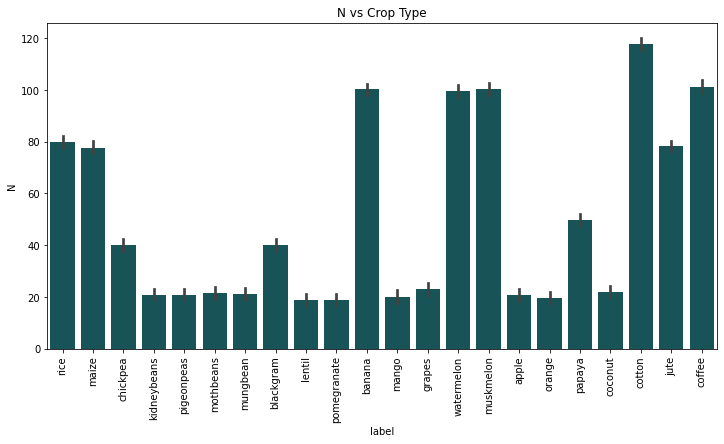

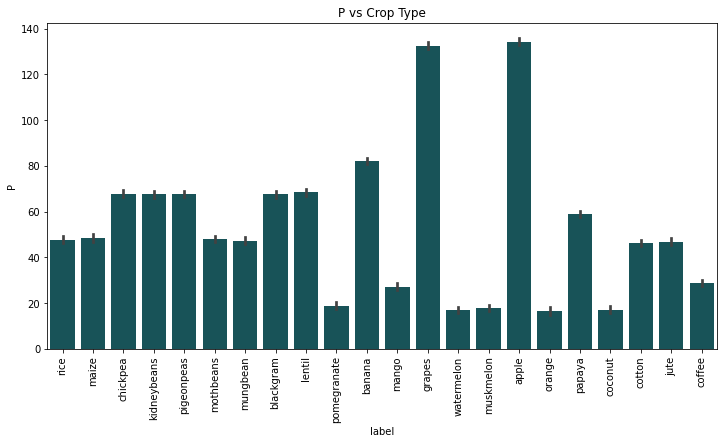

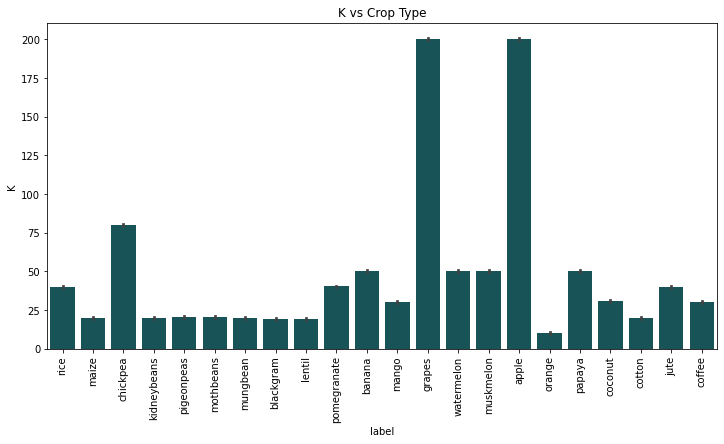

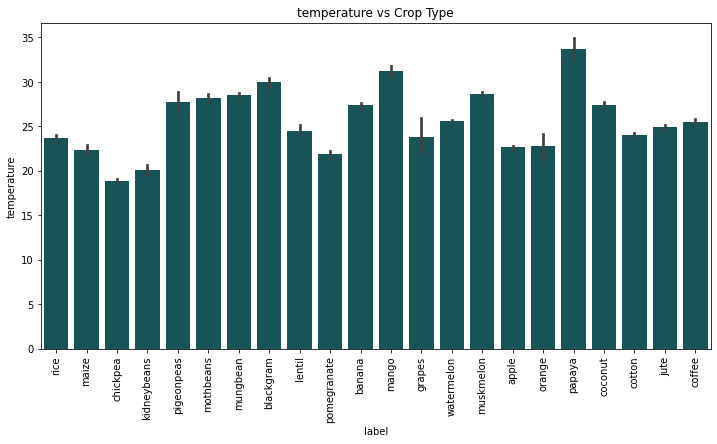

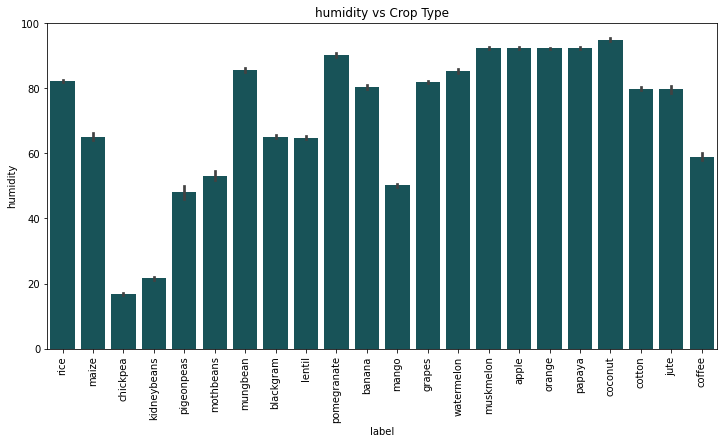

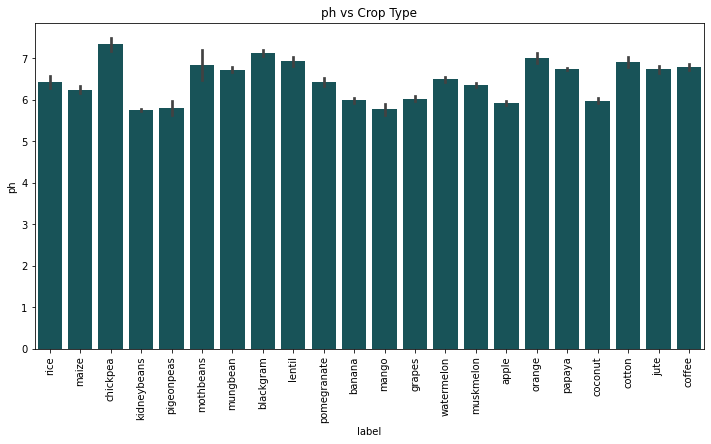

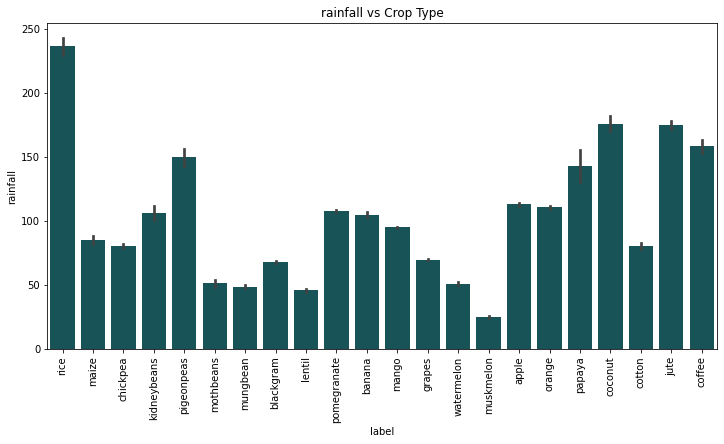

In [19]:
#plotting visualizations for bivariate analysis
all_att = crops.columns[:-1]

for attributes in all_att:
    plt.figure(figsize=(12,6))
    sns.barplot(x = "label", y = attributes, data = crops, palette=["#0D5C63"] )
    plt.xticks(rotation=90)
    plt.title(f"{attributes} vs Crop Type")
    plt.show()

Text(0, 0.5, 'Crops')

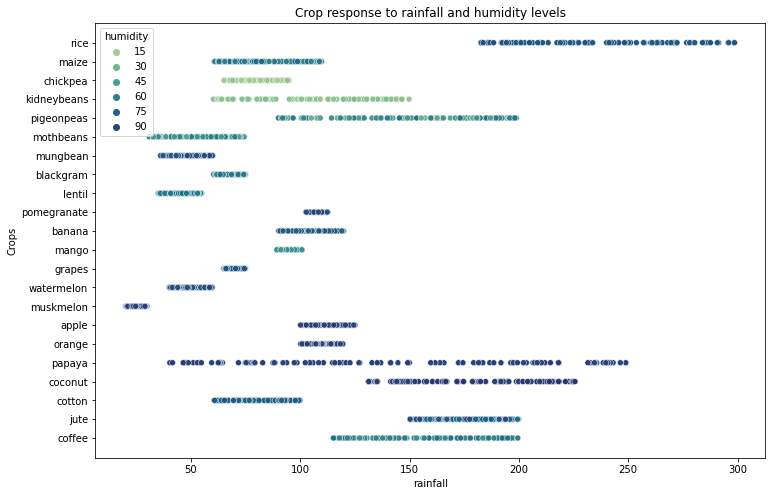

In [20]:
plt.figure(figsize=(12,8))
plt.title("Crop response to rainfall and humidity levels")
sns.scatterplot(data=crops, x="rainfall", y="label", hue="humidity", palette = "crest")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

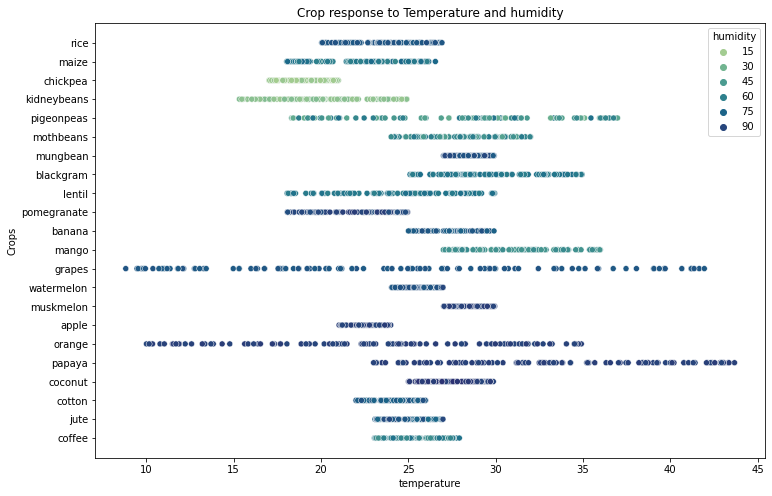

In [21]:
plt.figure(figsize=(12,8))
plt.title("Crop response to Temperature and humidity")
sns.scatterplot(data=crops, x="temperature", y="label", hue="humidity", palette = "crest")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

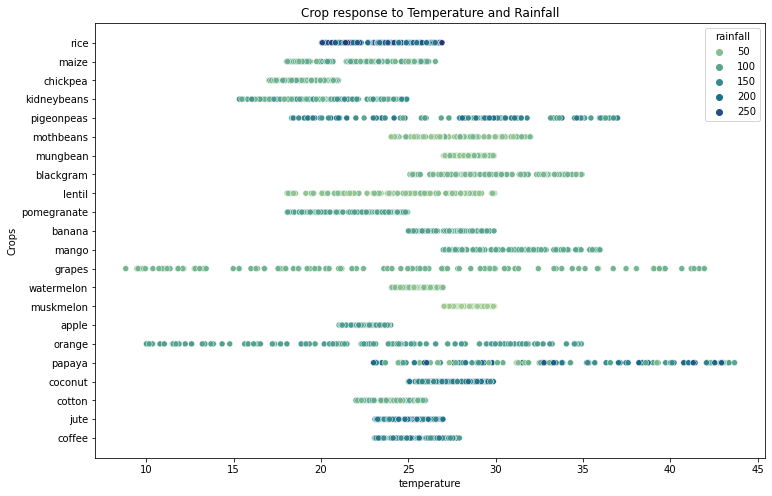

In [22]:
plt.figure(figsize=(12,8))
plt.title("Crop response to Temperature and Rainfall")
sns.scatterplot(data=crops, x="temperature", y="label", hue="rainfall", palette = "crest")
plt.ylabel("Crops")

In [23]:
# Varying temperature and humidity to know crops to grow in what season
print("Crops that grow best in Summer")
print(crops[(crops['temperature'] > 30) & (
    crops['humidity'] > 50)]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops that grow best in Winter")
print(crops[(crops['temperature'] < 20) & (
    crops['humidity'] > 30)]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops that grow best in Rainy season")
print(crops[(crops['rainfall'] > 200) & (
    crops['humidity'] > 50)]['label'].unique())

Crops that grow best in Summer
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------------
Crops that grow best in Winter
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------------
Crops that grow best in Rainy season
['rice' 'papaya' 'coconut']


<Figure size 936x648 with 0 Axes>

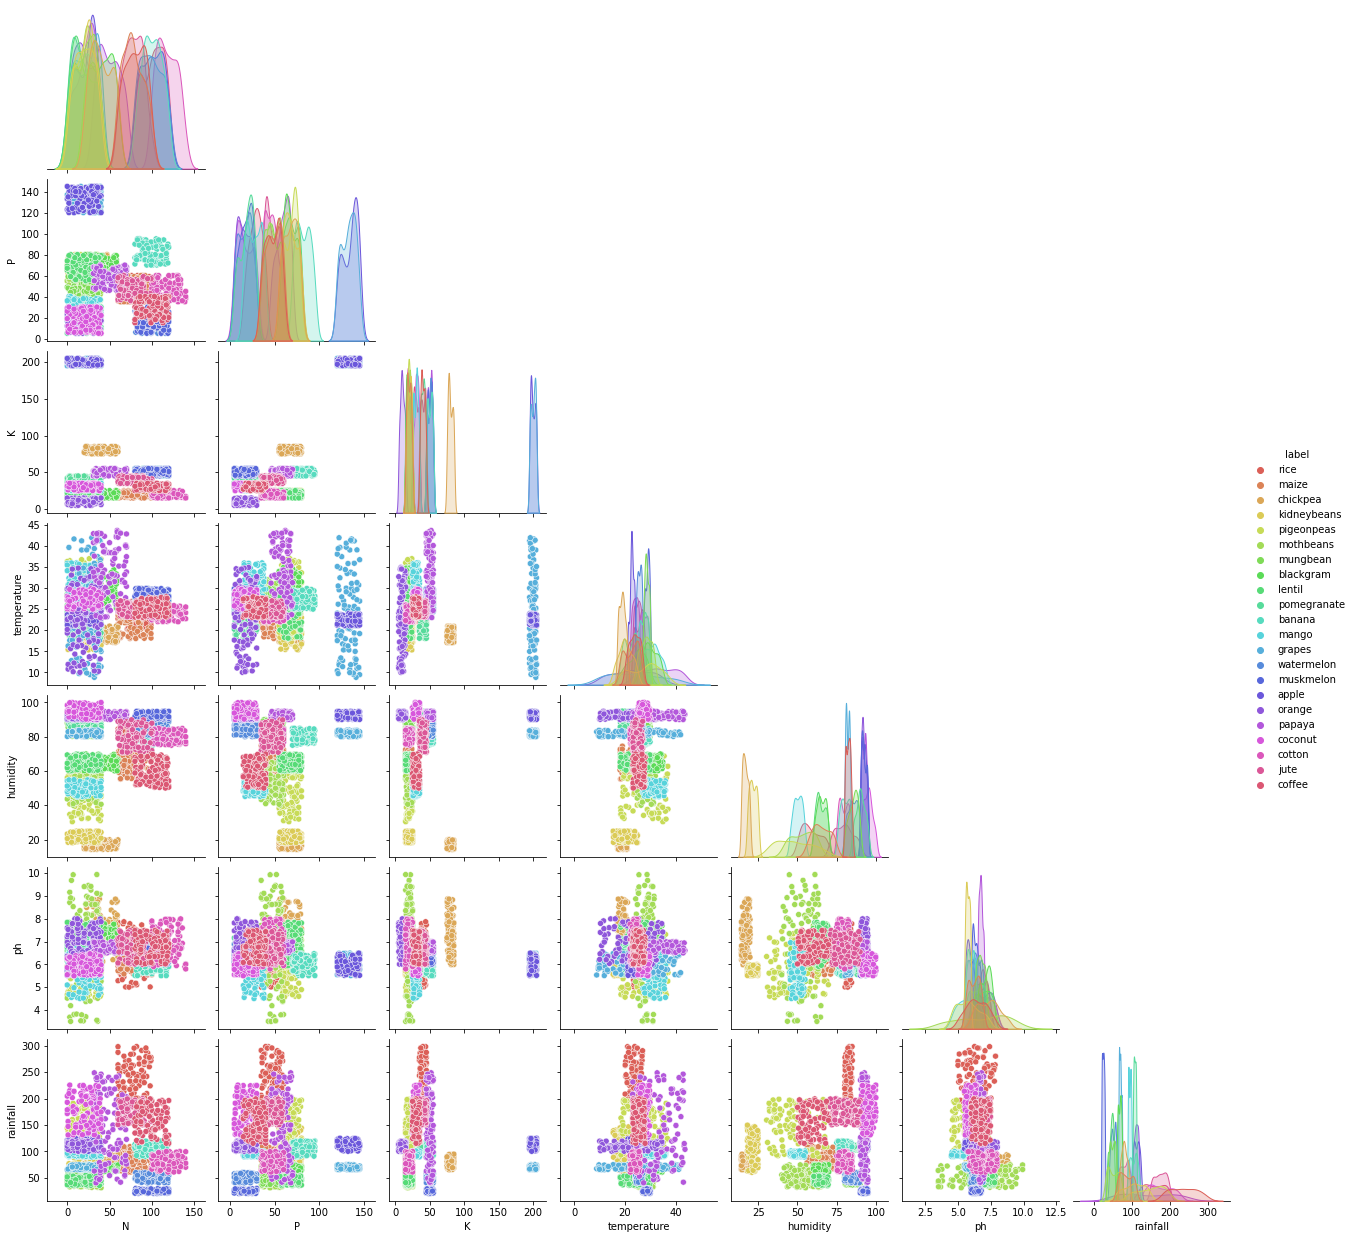

In [24]:
# pair plot of the attributes 
plt.figure(figsize=(13,9))
sns.pairplot(crops, hue = "label", palette = "hls", corner = True)
plt.show()

In [25]:
#correlation coefficients of the attributes
corr = crops.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


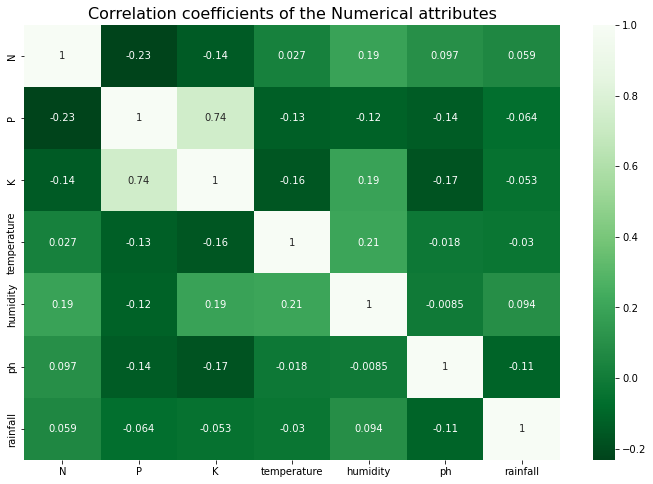

In [26]:
# correlation plot
plt.figure(figsize = (12,8))
sns.heatmap(crops.corr(),annot = True, cmap = "Greens_r")

plt.title("Correlation coefficients of the Numerical attributes", fontsize = 16, c="black")
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() # initializing an object of class LabelEncoder

#Fit and Transforming the label column.
crops["label"] = labelencoder.fit_transform(crops["label"]) 
crops

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [28]:
#correlation coefficients of the attributes
corr = crops.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


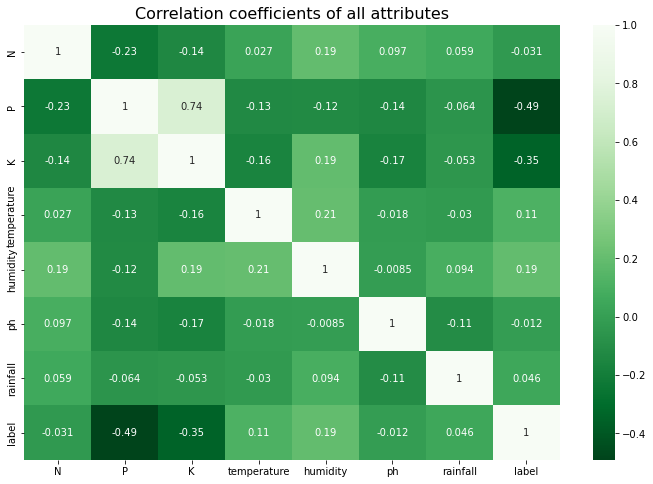

In [29]:
# correlation plot
plt.figure(figsize = (12,8))
sns.heatmap(crops.corr(),annot = True, cmap = "Greens_r")

plt.title("Correlation coefficients of all attributes", fontsize = 16, c="black")
plt.show()

In [30]:
# Declaring independent and target variables
X = num_crops
y = crops["label"]

## Data Split and Feature Scaling 

In [31]:
#split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X.shape,X_train.shape,X_test.shape)

# Applying the scaler to the training and test set
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)

X_test_scaled = scale.transform(X_test)

(2200, 7) (1760, 7) (440, 7)


## Model Selection

### Naive Bayes Classifier

In [32]:
#Create a Gaussian Classifier
NaiveBayes = GaussianNB()

# Train the model using the training sets
NaiveBayes.fit(X_train_scaled, y_train)

# checking for acurracy of the train test
train_NB = NaiveBayes.predict(X_train_scaled)
print(f"Naive Bayes Accuracy on training data: {metrics.accuracy_score(y_train, train_NB):.4f}")

#print classification report f the train test for Naive Bayes model
Naive_report_t = classification_report(y_train,train_NB)
print("Classification report for Naive Bayes model on train set:\n", Naive_report_t)


Naive Bayes Accuracy on training data: 0.9949
Classification report for Naive Bayes model on train set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        83
           6       0.99      1.00      0.99        78
           7       1.00      1.00      1.00        71
           8       0.92      0.97      0.95        75
           9       1.00      1.00      1.00        80
          10       1.00      1.00      1.00        82
          11       1.00      0.99      0.99        80
          12       1.00      1.00      1.00        83
          13       1.00      1.00      1.00        76
          14       1.00      1.00      1.00        76
          15       1.00      1

In [33]:
#Predict the response for test dataset
pred_NB = NaiveBayes.predict(X_test_scaled)

# printing the accuracy of the model
acc_NB = metrics.accuracy_score(y_test, pred_NB)
print(f"Overall Accuracy for Naive Bayes: {acc_NB:.4f}")

# Overall Precision, recall and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_NB, average='macro')

# print the results
print(f"Overall Precision for Naive Bayes: {precision:.4f}")
print(f"Overall Recall for Naive Bayes: {recall:.4f}")
print(f"Overall F1 Score for Naive Bayes: {f1:.4f}")


#print classification report for Naive Bayes model
Naive_report = classification_report(y_test,pred_NB)
print(Naive_report)

Overall Accuracy for Naive Bayes: 0.9955
Overall Precision for Naive Bayes: 0.9966
Overall Recall for Naive Bayes: 0.9930
Overall F1 Score for Naive Bayes: 0.9945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        29
           8       0.93      1.00      0.96        25
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        24
          14       1.00   

In [34]:
# Checking the cross validation score for Naive Bayes model
# perform a 5-fold cross-validation and print the mean accuracy

score = cross_val_score(NaiveBayes,X,y,cv=5)
print("Cross validation score: ", score)
print("Mean accuracy:", score.mean())

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Mean accuracy: 0.9950000000000001


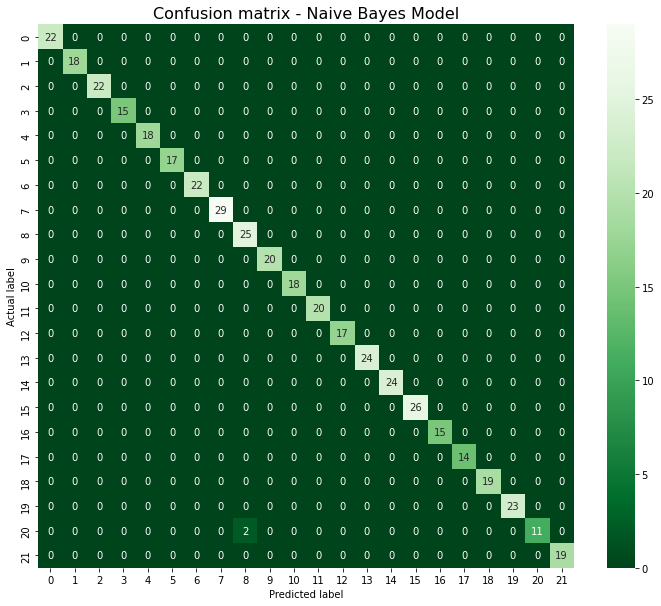

In [35]:
# passing actual and predicted values
matrix = confusion_matrix(y_test, pred_NB)

# visualize confusion matrix with seaborn heatmap
plt.figure(figsize = (12,10))
sns.heatmap(matrix, annot=True, cmap = "Greens_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion matrix - Naive Bayes Model", fontsize = 16, c="black")
plt.show()
#plt.savefig('confusion.png')

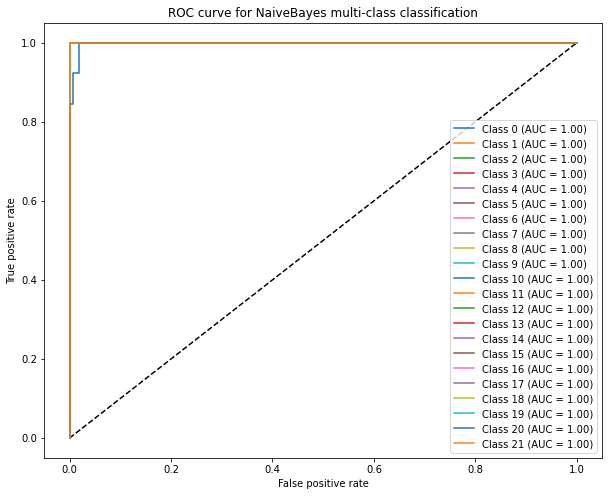

In [36]:
# Train a Naive Bayes classifier wrapped with OneVsRestClassifier
classifier = OneVsRestClassifier(NaiveBayes)
classifier.fit(X_train_scaled, y_train)

# Predict the probabilities of each class for each example in the test set
probas = classifier.predict_proba(X_test_scaled)

# Binarize the labels
y_bin = label_binarize(y_test, classes=range(22))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(22):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), probas.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], "k--")
for i in range(22):
    plt.plot(fpr[i], tpr[i], label="Class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for NaiveBayes multi-class classification")
plt.legend(loc="lower right")
plt.show()


### KNN Classifier

### Searching for Best K value

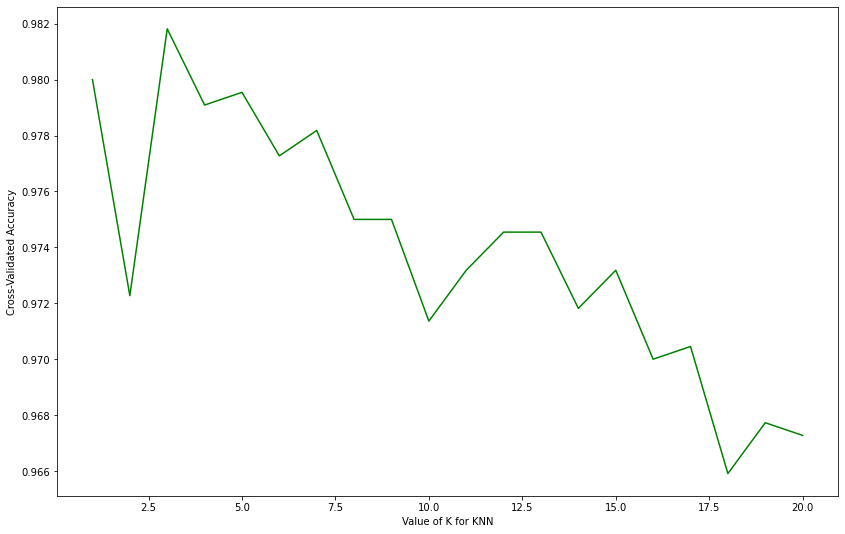

Best K: 3
Best accuracy score: 0.9818


In [37]:
# Define a function to find the best hyperparameter
def find_best_k(max_k):
    k_range = range(1, max_k+1)
    scores = []
    best_k = 0
    best_score = 0
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = np.mean(cross_val_score(knn, X, y, cv=5))
        scores.append(score)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    # Plot the accuracy score for each K value
    fig,ax = plt.subplots(figsize=(14,9))
    plt.plot(k_range, scores, color = "g")
    plt.xlabel("Value of K for KNN")
    plt.ylabel("Cross-Validated Accuracy")
    plt.show()
    
    return best_k, best_score

# Find the best hyperparameter and plot the accuracy score for each K value
best_k, best_score = find_best_k(20)

# Print the best hyperparameter and accuracy score
print("Best K:", best_k)
print(f"Best accuracy score: {best_score:.4f}")


In [38]:
#Create a KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train_scaled, y_train)

# checking for acurracy of the train test
train_knn = knn.predict(X_train_scaled)
print(f"KNN Accuracy on training data: {metrics.accuracy_score(y_train, train_knn):.4f}")

#print classification report of the train test for Knn model
knn_report_t = classification_report(y_train,train_knn)
print(knn_report_t)

KNN Accuracy on training data: 0.9892
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        82
           2       0.97      0.99      0.98        78
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        82
           5       0.99      0.99      0.99        83
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00        71
           8       0.92      0.93      0.93        75
           9       0.98      1.00      0.99        80
          10       0.96      0.98      0.97        82
          11       1.00      1.00      1.00        80
          12       0.99      1.00      0.99        83
          13       1.00      0.96      0.98        76
          14       1.00      1.00      1.00        76
          15       1.00      1.00      1.00        74
          16       1.00      1.00      1.00

In [39]:
#Predict the response for test dataset
pred_knn = knn.predict(X_test_scaled)

# printing the accuracy of the Knn model
acc_knn = metrics.accuracy_score(y_test, pred_knn)

print(f"KNN Accuracy is: {acc_knn:.4f}")

# Overall Precision, recall and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_knn, average='macro')

# print the results
print(f"Overall Precision for KNN: {precision:.4f}")
print(f"Overall Recall for KNN: {recall:.4f}")
print(f"Overall F1 Score for KNN: {f1:.4f}")

#print classification report for Knn model
knn_report = classification_report(y_test,pred_knn)
print(knn_report)

KNN Accuracy is: 0.9773
Overall Precision for KNN: 0.9762
Overall Recall for KNN: 0.9755
Overall F1 Score for KNN: 0.9753
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        17
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        29
           8       0.88      0.92      0.90        25
           9       1.00      1.00      1.00        20
          10       0.90      1.00      0.95        18
          11       1.00      0.95      0.97        20
          12       0.94      1.00      0.97        17
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        24
          15 

In [40]:
# Checking the cross validation score for KNN model
score = cross_val_score(knn,X,y,cv=5)
print("Cross validation score: ",score)
print("Mean accuracy:", score.mean())

Cross validation score:  [0.97954545 0.975      0.98181818 0.99090909 0.98181818]
Mean accuracy: 0.9818181818181818


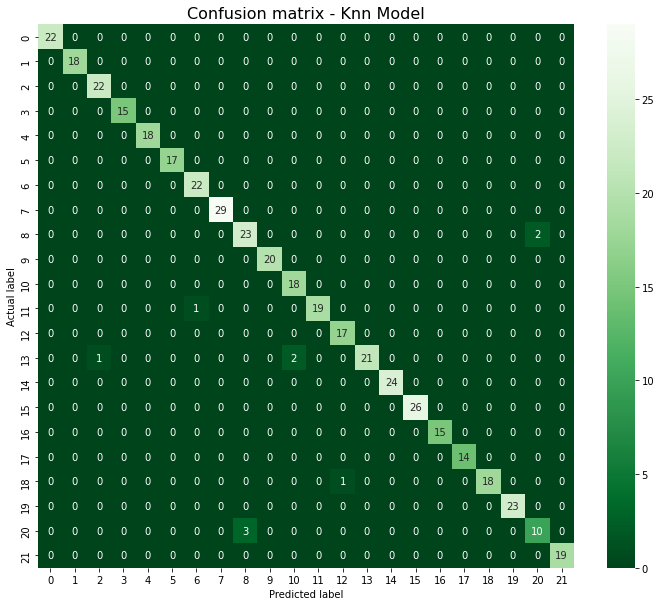

In [41]:
# passing actual and predicted values
matrix_knn = confusion_matrix(y_test, pred_knn)

# visualize confusion matrix with seaborn heatmap
plt.figure(figsize = (12,10))
sns.heatmap(matrix_knn, annot=True, cmap = "Greens_r" )
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion matrix - Knn Model", fontsize = 16, c="black")
plt.show()
#plt.savefig('confusion.png')

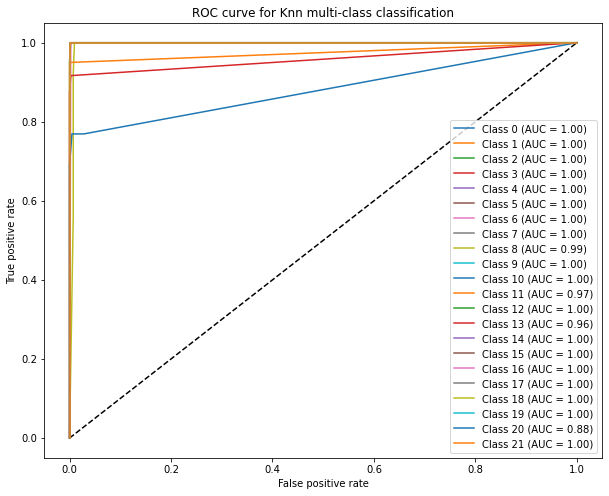

In [42]:
# Train a KNN classifier wrapped with OneVsRestClassifier
classifier = OneVsRestClassifier(knn)
classifier.fit(X_train_scaled, y_train)

# Predict the probabilities of each class for each example in the test set
probas = classifier.predict_proba(X_test_scaled)

# Binarize the labels
y_bin = label_binarize(y_test, classes=range(22))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(22):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), probas.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], "k--")
for i in range(22):
    plt.plot(fpr[i], tpr[i], label="Class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for Knn multi-class classification")
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [43]:
#Create a RandomForestClassifier
RF = RandomForestClassifier(random_state = 222)

# Train the model using the training sets
RF.fit(X_train_scaled, y_train)

# checking for acurracy of the train test
train_RF = RF.predict(X_train_scaled)
print(f"Random Forest Accuracy on training data: {metrics.accuracy_score(y_train, train_RF)}")

#print classification report of the train test for Random Foest model
RF_report_t = classification_report(y_train,train_RF)
print(RF_report_t)

Random Forest Accuracy on training data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00        71
           8       1.00      1.00      1.00        75
           9       1.00      1.00      1.00        80
          10       1.00      1.00      1.00        82
          11       1.00      1.00      1.00        80
          12       1.00      1.00      1.00        83
          13       1.00      1.00      1.00        76
          14       1.00      1.00      1.00        76
          15       1.00      1.00      1.00        74
          16       1.00      1.00   

In [44]:
#Predict the response for test dataset
pred_RF = RF.predict(X_test_scaled)

# printing the accuracy of the model
acc_RF = metrics.accuracy_score(y_test, pred_RF)
print(f"Overall Accuracy for Random Forest: {acc_RF:.4f}")

# Overall Precision, recall and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_RF, average='macro')

# print the results
print(f"Overall Precision for Random Forest: {precision:.4f}")
print(f"Overall Recall for Random Forest: {recall:.4f}")
print(f"Overall F1 Score for Random Forest: {f1:.4f}")

#print classification report of the train for RandomForest model
RF_report = classification_report(y_test,pred_RF)
print(RF_report)

Overall Accuracy for Random Forest: 0.9977
Overall Precision for Random Forest: 0.9983
Overall Recall for Random Forest: 0.9965
Overall F1 Score for Random Forest: 0.9973
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        29
           8       0.96      1.00      0.98        25
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        24
          14      

In [45]:
# Checking the cross validation score for Random Forest model
score = cross_val_score(RF,X,y,cv=5)
print("Cross validation score:",score)
print("Mean accuracy:", score.mean())

Cross validation score: [0.99772727 0.99090909 0.99545455 0.99545455 0.99090909]
Mean accuracy: 0.9940909090909091


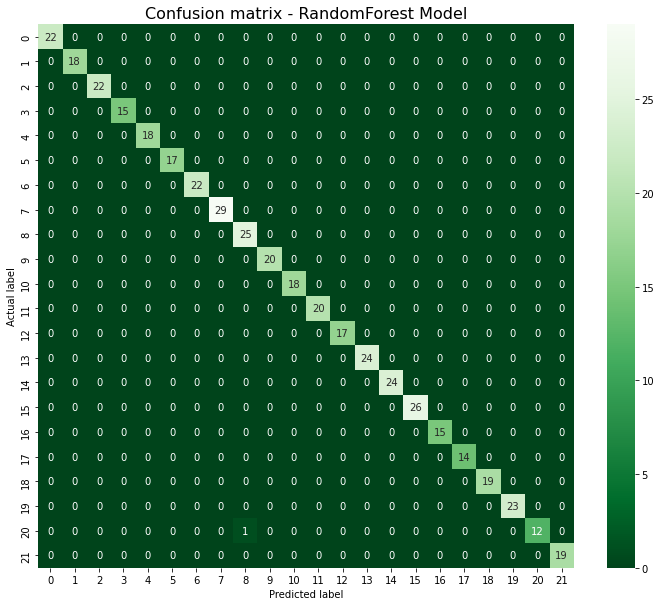

In [46]:
# passing actual and predicted values
matrix_RF = confusion_matrix(y_test, pred_RF)

# visualize confusion matrix with seaborn heatmap
plt.figure(figsize = (12,10))
sns.heatmap(matrix_RF, annot=True, cmap = "Greens_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion matrix - RandomForest Model", fontsize = 16, c="black")
plt.show()
#plt.savefig('confusion.png')

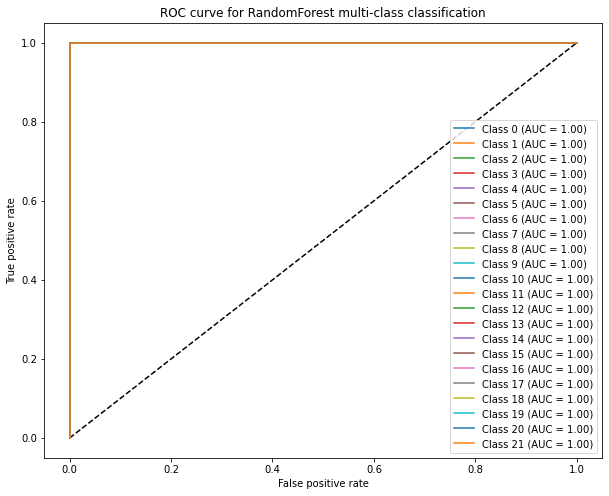

In [47]:
# Train a Random Forest classifier wrapped with OneVsRestClassifier
classifier = OneVsRestClassifier(RF)
classifier.fit(X_train_scaled, y_train)

# Predict the probabilities of each class for each example in the test set
probas = classifier.predict_proba(X_test_scaled)

# Binarize the labels
y_bin = label_binarize(y_test, classes=range(22))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(22):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), probas.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(22):
    plt.plot(fpr[i], tpr[i], label="Class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for RandomForest multi-class classification")
plt.legend(loc="lower right")
plt.show()


### Random Forest Feature Importance

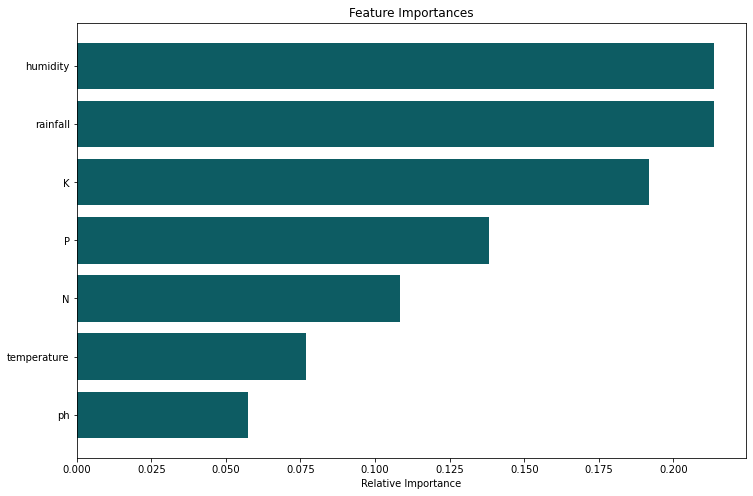

In [48]:
# Get feature importances from random forest
importances = RF.feature_importances_
indices = np.argsort(importances)

# Get feature names
feature_names = X.columns

# Plot feature importances
plt.figure(figsize = (12,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="#0D5C63", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


## Decision Tree

In [49]:
#Create a DecisonTreeClassifier
Tree = DecisionTreeClassifier()

# Train the model using the training sets
Tree.fit(X_train_scaled, y_train)

# checking for acurracy of the train test
train_tree = Tree.predict(X_train_scaled)
print(f"Decision Tree Accuracy on training data: {metrics.accuracy_score(y_train, train_tree)}")

#print classification report of the train set for Decision Tree model
Tree_report_t = classification_report(y_train,train_tree)
print(Tree_report_t)

Decision Tree Accuracy on training data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00        71
           8       1.00      1.00      1.00        75
           9       1.00      1.00      1.00        80
          10       1.00      1.00      1.00        82
          11       1.00      1.00      1.00        80
          12       1.00      1.00      1.00        83
          13       1.00      1.00      1.00        76
          14       1.00      1.00      1.00        76
          15       1.00      1.00      1.00        74
          16       1.00      1.00   

In [50]:
#Predict the response for test dataset
pred_tree = Tree.predict(X_test_scaled)

# printing the accuracy of the model
acc_tree = metrics.accuracy_score(y_test, pred_tree)
print(f"Overall Accuracy for Decision Tree: {acc_tree:.4f}")

# Overall Precision, recall and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_tree, average='macro')

# print the results
print(f"Overall Precision for Decision Tree: {precision:.4f}")
print(f"Overall Recall for Decision Tree: {recall:.4f}")
print(f"Overall F1 Score for Decision Tree: {f1:.4f}")

#print classification report for RandomForest model
Tree_report = classification_report(y_test,pred_tree)
print(Tree_report)

Overall Accuracy for Decision Tree: 0.9932
Overall Precision for Decision Tree: 0.9927
Overall Recall for Decision Tree: 0.9928
Overall F1 Score for Decision Tree: 0.9927
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        29
           8       0.96      0.96      0.96        25
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        17
          13       1.00      0.96      0.98        24
          14      

In [51]:
# Checking the cross validation score for Decision Tree model
score = cross_val_score(Tree,X,y,cv=5)
print("Cross validation score: ",score)
print("Mean accuracy:", score.mean())

Cross validation score:  [0.99090909 0.98409091 0.98636364 0.98409091 0.98636364]
Mean accuracy: 0.9863636363636363


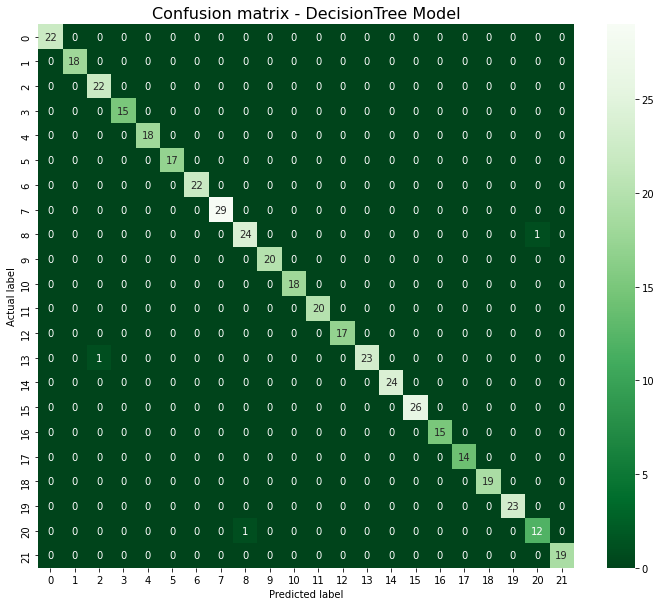

In [52]:
# passing actual and predicted values
matrix_tree = confusion_matrix(y_test, pred_tree)

# visualize confusion matrix with seaborn heatmap
plt.figure(figsize = (12,10))
sns.heatmap(matrix_tree, annot=True, cmap = "Greens_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion matrix - DecisionTree Model", fontsize = 16, c="black")
plt.show()
#plt.savefig('confusion.png')

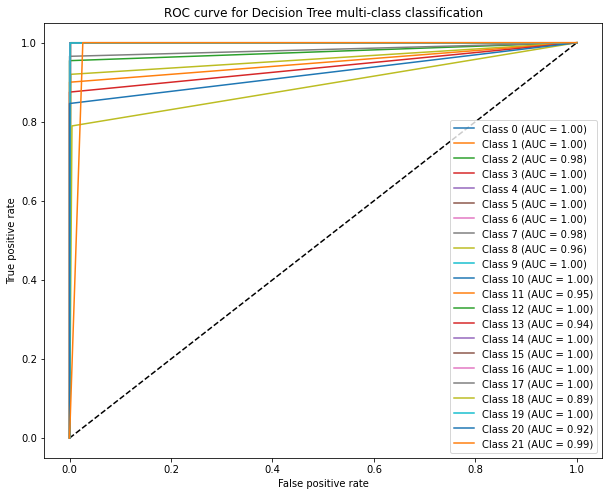

In [53]:
# Train a DecisionTree classifier wrapped with OneVsRestClassifier
classifier = OneVsRestClassifier(Tree)
classifier.fit(X_train_scaled, y_train)


# Predict the class labels for each example in the test set
y_pred = classifier.predict(X_test_scaled)

# Binarize the labels
y_bin = label_binarize(y_test, classes=range(22))
y_pred_bin = label_binarize(y_pred, classes=range(22))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(22):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], "k--")
for i in range(22):
    plt.plot(fpr[i], tpr[i], label="Class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for Decision Tree multi-class classification")
plt.legend(loc="lower right")
plt.show()


## Gradient Boosting

In [54]:
#Create a GradientBoostingClassifier
GB = GradientBoostingClassifier()

# Train the model using the training sets
GB.fit(X_train_scaled, y_train)

# checking for acurracy of the train test
train_GB = GB.predict(X_train_scaled)
print(f"Gradient Boosting Accuracy on training data: {metrics.accuracy_score(y_train, train_GB)}")

#print classification report f the train test for GradientBoosting model
GB_report_t = classification_report(y_train,train_GB)
print(GB_report_t)


Gradient Boosting Accuracy on training data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00        71
           8       1.00      1.00      1.00        75
           9       1.00      1.00      1.00        80
          10       1.00      1.00      1.00        82
          11       1.00      1.00      1.00        80
          12       1.00      1.00      1.00        83
          13       1.00      1.00      1.00        76
          14       1.00      1.00      1.00        76
          15       1.00      1.00      1.00        74
          16       1.00      1.0

In [55]:
#Predict the response for test dataset
pred_GB = GB.predict(X_test_scaled)

# printing the accuracy of the model
acc_GB = metrics.accuracy_score(y_test, pred_GB)
print(f"Overall Accuracy for Gradient Boost: {acc_GB:.4f}")

# Overall Precision, recall and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_GB, average='macro')

# print the results
print(f"Overall Precision for Gradient Boost: {precision:.4f}")
print(f"Overall Recall for Gradient Boost: {recall:.4f}")
print(f"Overall F1 Score for Gradient Boost: {f1:.4f}")


#print classification report for Gradient Boost model
GB_report = classification_report(y_test,pred_GB)
print(GB_report)

Overall Accuracy for Gradient Boost: 0.9955
Overall Precision for Gradient Boost: 0.9966
Overall Recall for Gradient Boost: 0.9930
Overall F1 Score for Gradient Boost: 0.9945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        29
           8       0.93      1.00      0.96        25
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        24
          14  

In [56]:
# Checking the cross validation score for Gradient Boost model
score = cross_val_score(GB,X,y,cv=5)
print("Cross validation score: ",score)
print("Mean accuracy:", score.mean())

Cross validation score:  [0.99090909 0.98863636 0.99318182 0.99772727 0.98636364]
Mean accuracy: 0.9913636363636364


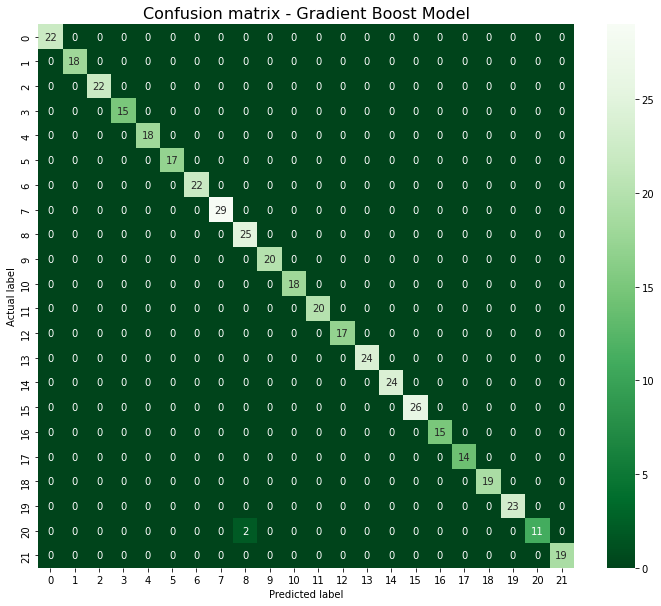

In [57]:
# passing actual and predicted values
matrix_GB = confusion_matrix(y_test, pred_GB)

# visualize confusion matrix with seaborn heatmap
plt.figure(figsize = (12,10))
sns.heatmap(matrix_GB, annot=True, cmap = "Greens_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion matrix - Gradient Boost Model", fontsize = 16, c="black")
plt.show()
#plt.savefig('confusion.png')

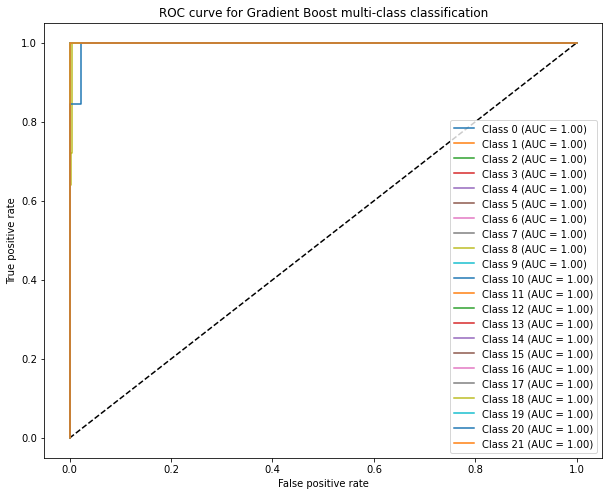

In [58]:
# Train a Gradient Boost classifier wrapped with OneVsRestClassifier
classifier = OneVsRestClassifier(GB)
classifier.fit(X_train_scaled, y_train)

# Predict the probabilities of each class for each example in the test set
probas = classifier.predict_proba(X_test_scaled)

# Binarize the labels
y_bin = label_binarize(y_test, classes=range(22))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(22):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), probas.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], "k--")
for i in range(22):
    plt.plot(fpr[i], tpr[i], label="Class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for Gradient Boost multi-class classification")
plt.legend(loc="lower right")
plt.show()


<Figure size 720x576 with 0 Axes>

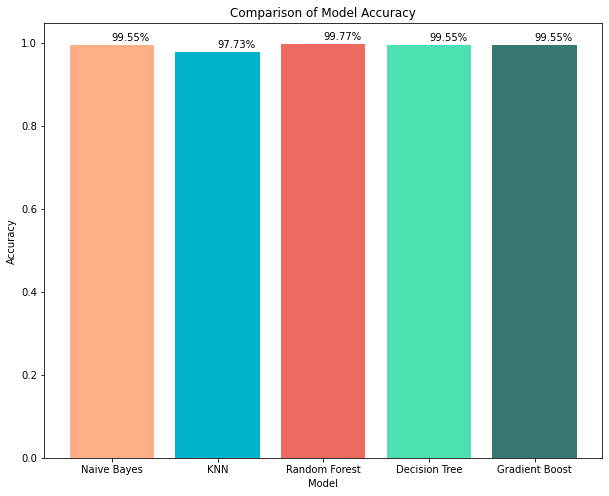

In [69]:
# Define model names and accuracy scores
models = ["Naive Bayes","KNN", "Random Forest", "Decision Tree", "Gradient Boost"]
accuracy_scores = [0.9955, 0.9773, 0.9977, 0.9955, 0.9955]

plt.figure(figsize=(10, 8))
# Create bar plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(models, accuracy_scores, color = ["#FFAF87", "#00B2CA", "#ED6A5E", "#4CE0B3", "#377771"])

# Add x-axis and y-axis labels
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")

# Add plot title
ax.set_title("Comparison of Model Accuracy")

# Add percentage values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.4, yval+0.01, str(round(yval*100,2))+'%')

# Show plot
plt.show()